In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import seed
seed(1)
import pandas.util.testing as tm
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import tensorflow
tensorflow.random.set_seed(1)
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import keras
from keras.models import Sequential
from keras.layers import Dense

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  


In [ ]:
from google.colab import files
uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded['bitcoin.csv']),encoding = 'unicode escape')


Saving bitcoin.csv to bitcoin.csv


In [ ]:
df = df.dropna(axis = 1)
df.head()

,Date,High,Low,Open,Close,Volume,Label
0,2013-01-01,777.510010,713.599976,763.280029,735.070007,46862700,Low
1,2013-01-02,747.059998,705.349976,737.979981,727.830017,32505800,Low
2,2013-01-03,748.609985,714.440002,728.049988,745.049988,19011300,Low
3,2013-01-04,766.599976,740.239990,741.349976,756.130005,20707700,Low
4,2013-01-05,760.580017,738.169983,760.320007,754.010010,20897300,High


In [ ]:
label_quality = LabelEncoder()
df['Label'] = label_quality.fit_transform(df['Label'])
df

,Date,High,Low,Open,Close,Volume,Label
0,2013-01-01,777.510010,713.599976,763.280029,735.070007,46862700,1
1,2013-01-02,747.059998,705.349976,737.979981,727.830017,32505800,1
2,2013-01-03,748.609985,714.440002,728.049988,745.049988,19011300,1
3,2013-01-04,766.599976,740.239990,741.349976,756.130005,20707700,1
4,2013-01-05,760.580017,738.169983,760.320007,754.010010,20897300,0
...,...,...,...,...,...,...,...
2744,2020-07-07,33939.588700,32770.680780,33549.600180,33897.048590,38728974942,1
2745,2020-07-08,34909.259900,33402.696540,33854.421360,34668.548400,24383958643,0
2746,2020-07-09,35937.567150,34396.477460,34665.564870,35287.779770,24924307911,0
2747,2020-07-10,35284.344430,33213.661030,35284.344430,33746.002460,26721554282,1


In [ ]:
x = df[['Open','Volume','High','Low']]
y = np.array(df['Close'])

In [ ]:
label_quality = LabelEncoder()
df['Label'] = label_quality.fit_transform(df['Label'])
df

,Date,High,Low,Open,Close,Volume,Label
0,2013-01-01,777.510010,713.599976,763.280029,735.070007,46862700,1
1,2013-01-02,747.059998,705.349976,737.979981,727.830017,32505800,1
2,2013-01-03,748.609985,714.440002,728.049988,745.049988,19011300,1
3,2013-01-04,766.599976,740.239990,741.349976,756.130005,20707700,1
4,2013-01-05,760.580017,738.169983,760.320007,754.010010,20897300,0
...,...,...,...,...,...,...,...
2744,2020-07-07,33939.588700,32770.680780,33549.600180,33897.048590,38728974942,1
2745,2020-07-08,34909.259900,33402.696540,33854.421360,34668.548400,24383958643,0
2746,2020-07-09,35937.567150,34396.477460,34665.564870,35287.779770,24924307911,0
2747,2020-07-10,35284.344430,33213.661030,35284.344430,33746.002460,26721554282,1


In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y)

In [ ]:
y_train=np.reshape(y_train, (-1,1))
y_val=np.reshape(y_val, (-1,1))
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
print(scaler_x.fit(x_train))
xtrain_scale=scaler_x.transform(x_train)
print(scaler_x.fit(x_val))
xval_scale=scaler_x.transform(x_val)
print(scaler_y.fit(y_train))
ytrain_scale=scaler_y.transform(y_train)
print(scaler_y.fit(y_val))
yval_scale=scaler_y.transform(y_val)

MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))


In [ ]:
#Input layer (No of neurons) = No of training set features +1
#Hence 6.
#To find hidden layer in the data,
samples = 2751
in_neurons = 4
out_neurons = 1
hidden = samples/(1*(in_neurons + out_neurons))
print("Hidden layers : ",round(hidden))

Hidden layers :  550


In [ ]:
#Output layer
model = Sequential()
model.add(Dense(500,input_dim = 4, kernel_initializer='normal',activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation = 'relu'))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               2500      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               50100     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 57,701
Trainable params: 57,701
Non-trainable params: 0
_________________________________________________________________


**Batch size**

*Refers to the number of training examples per one forward/backward pass.*



**Epoch**

*One forward and backward pass for all training examples.*


In [ ]:
#Finding MSE, Mean Absolute Error and train-test ratio of 80-20

model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history=model.fit(xtrain_scale, ytrain_scale, epochs=30, batch_size=150, verbose=1, validation_split=0.2)
predictions = model.predict(xval_scale)

Epoch 1/30
11/11 [==============================] - 15s 61ms/step - loss: 0.0345 - mse: 0.0345 - mae: 0.0929 - val_loss: 0.0064 - val_mse: 0.0064 - val_mae: 0.0687
Epoch 2/30
11/11 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045 - mae: 0.0597 - val_loss: 4.3436e-04 - val_mse: 4.3436e-04 - val_mae: 0.0161
Epoch 3/30
11/11 [==============================] - 0s 8ms/step - loss: 5.8213e-04 - mse: 5.8213e-04 - mae: 0.0176 - val_loss: 6.9860e-04 - val_mse: 6.9860e-04 - val_mae: 0.0154
Epoch 4/30
11/11 [==============================] - 0s 6ms/step - loss: 3.5084e-04 - mse: 3.5084e-04 - mae: 0.0123 - val_loss: 1.1540e-04 - val_mse: 1.1540e-04 - val_mae: 0.0083
Epoch 5/30
11/11 [==============================] - 0s 6ms/step - loss: 1.2189e-04 - mse: 1.2189e-04 - mae: 0.0082 - val_loss: 6.1121e-05 - val_mse: 6.1121e-05 - val_mae: 0.0045
Epoch 6/30
11/11 [==============================] - 0s 6ms/step - loss: 5.2652e-05 - mse: 5.2652e-05 - mae: 0.0045 - val_loss: 6.167

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


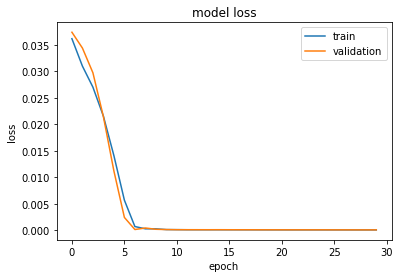

In [ ]:
#30 epochs have been specified for our model. We are training over 30 forward and backward passes
#Plotting losses

print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()


In [ ]:
predictions = scaler_y.inverse_transform(predictions)
predictions

array([[ 6526.397  ],
       [  662.38055],
       [13439.212  ],
       [16067.992  ],
       [  292.2522 ],
       [17890.396  ],
       [ 2365.4631 ],
       [  435.0608 ],
       [  313.02728],
       [10469.229  ],
       [  572.0115 ],
       [10197.449  ],
       [10155.301  ],
       [  279.9706 ],
       [11994.72   ],
       [ 1373.3972 ],
       [ 1124.1559 ],
       [ 2437.46   ],
       [  585.04535],
       [14024.069  ],
       [11065.337  ],
       [ 2597.274  ],
       [  440.7258 ],
       [  807.6056 ],
       [  493.95615],
       [ 7707.5947 ],
       [ 9746.369  ],
       [14084.415  ],
       [48030.848  ],
       [  292.04388],
       [ 2362.0745 ],
       [57385.664  ],
       [  619.19183],
       [  779.14294],
       [20377.76   ],
       [ 5891.9814 ],
       [12512.481  ],
       [  751.15393],
       [  533.4593 ],
       [  449.34015],
       [  416.33163],
       [  399.22867],
       [14278.789  ],
       [ 7257.447  ],
       [10804.496  ],
       [  

In [ ]:
math.sqrt(mean_squared_error(y_val,predictions))


136.6058261062362

Running predictions for N2 dataset


Epochs  =  

In [ ]:
#We increase the number of epochs (number of training examples per one forward/backward pass) to 150 and batch_size = 20

model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history=model.fit(xtrain_scale, ytrain_scale, epochs=150, batch_size=20, verbose=1, validation_split=0.2)
predictions = model.predict(xval_scale)

Epoch 1/150
83/83 [==============================] - 1s 4ms/step - loss: 8.3270e-05 - mse: 8.3270e-05 - mae: 0.0054 - val_loss: 6.8282e-05 - val_mse: 6.8282e-05 - val_mae: 0.0047
Epoch 2/150
83/83 [==============================] - 0s 2ms/step - loss: 8.1216e-05 - mse: 8.1216e-05 - mae: 0.0055 - val_loss: 1.1893e-04 - val_mse: 1.1893e-04 - val_mae: 0.0046
Epoch 3/150
83/83 [==============================] - 0s 2ms/step - loss: 9.9648e-05 - mse: 9.9648e-05 - mae: 0.0064 - val_loss: 7.4194e-05 - val_mse: 7.4194e-05 - val_mae: 0.0050
Epoch 4/150
83/83 [==============================] - 0s 2ms/step - loss: 5.6867e-05 - mse: 5.6867e-05 - mae: 0.0037 - val_loss: 5.3458e-05 - val_mse: 5.3458e-05 - val_mae: 0.0035
Epoch 5/150
83/83 [==============================] - 0s 2ms/step - loss: 7.9308e-05 - mse: 7.9308e-05 - mae: 0.0057 - val_loss: 8.2734e-05 - val_mse: 8.2734e-05 - val_mae: 0.0065
Epoch 6/150
83/83 [==============================] - 0s 2ms/step - loss: 9.0147e-05 - mse: 9.0147e-05 - m

In [ ]:
mae = mean_absolute_error(y_val,predictions)
print("Mean Absolute Error : {}" .format(mae));

Mean Absolute Error : 72.79668420103901


In [ ]:
mse = math.sqrt(mean_squared_error(y_val,predictions)
print("Mean Squared Error : {}".format(mse))

Mean Squared Error : 136.6058261062362


We  understand  that  increasing/decreasing  batch  size  or  size  of epochs  doesnt  result  in  much  improvement  of  RMSE  and  MAE.

Activation functions are used to reduce non-linearity into the input and hidden layers, in case if the variables are of different datatypes.

Previously ReLU was used.  Now I try to go with another function called Swish.

In [ ]:
model = Sequential()
model.add(Dense(5,input_dim = 5, kernel_initializer='normal',activation='swish'))
model.add(Dense(458,activation='swish'))
model.add(Dense(1,activation = 'linear'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_4 (Dense)              (None, 458)               2748      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 459       
Total params: 3,237
Trainable params: 3,237
Non-trainable params: 0
_________________________________________________________________


dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


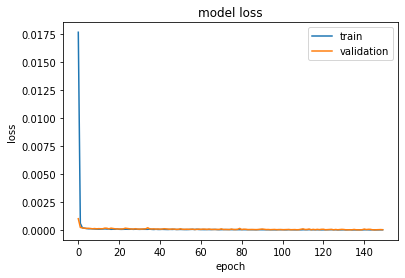

In [ ]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [ ]:
mse2 = math.sqrt(mean_squared_error(y_val,predictions))
print("Mean Squared Error : {}" .format(mse2));

Mean Squared Error : 136.6058261062362


In [ ]:
mae2 = mean_absolute_error(y_val,predictions)
print("Mean Absolute Error : {}" .format(mae2));

Mean Absolute Error : 72.79668420103901


RMSE  is relatively lower while using Swish activation function  compared to ReLU (Rectified Linear Activation Function).